# Qa)

# Qb)

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)
OK


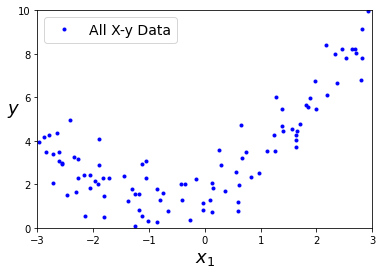

In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')

In [8]:

# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []

    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.4f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.5752
  epoch=   1, mse_train=11.51, mse_val=14.0982
  epoch=   2, mse_train=11.15, mse_val=13.6009
  epoch=   3, mse_train=10.81, mse_val=13.1342
  epoch=   4, mse_train=10.49, mse_val=12.7000
  epoch=   5, mse_train=10.18, mse_val=12.2951
  epoch=   6, mse_train=9.88, mse_val=11.9166
  epoch=   7, mse_train=9.60, mse_val=11.5618
  epoch=   8, mse_train=9.33, mse_val=11.2282
  epoch=   9, mse_train=9.07, mse_val=10.9138
  epoch=  10, mse_train=8.82, mse_val=10.6168
  epoch=  11, mse_train=8.59, mse_val=10.3356
  epoch=  12, mse_train=8.36, mse_val=10.0688
  epoch=  13, mse_train=8.14, mse_val=9.8151
  epoch=  14, mse_train=7.93, mse_val=9.5735
  epoch=  15, mse_train=7.72, mse_val=9.3430
  epoch=  16, mse_train=7.53, mse_val=9.1227
  epoch=  17, mse_train=7.34, mse_val=8.9118
  epoch=  18, mse_train=7.16, mse_val=8.7097
  epoch=  19, mse_train=6.98, mse_val=8.5157
  epoch=  20, mse_train=6.81, mse_val=8.3293
  epoch=  2

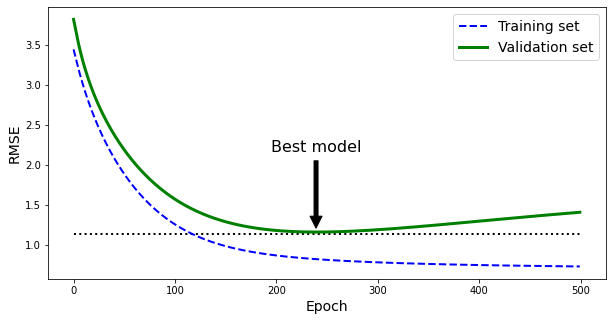

In [5]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Qc)


In [10]:
def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []

    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict   = sgd_reg.predict(X_val)

    mse_train_new = mean_squared_error(y_train, y_train_predict)
    mse_val_new   = mean_squared_error(y_val  , y_val_predict)
    for epoch in range(n_epochs):
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)
        mse_train_old = mse_train_new
        mse_val_old = mse_val_new
        mse_train_new=mean_squared_error(y_train, y_train_predict)
        mse_val_new  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train_new)
        val_errors  .append(mse_val_new)

        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train_new:4.2f}, mse_val={mse_val_new:4.2f}")

        if mse_val_new > mse_val_old:
            break

        sgd_reg.fit(X_train, y_train)

    return train_errors, val_errors
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

# Qd)